### Layered feedback control circuit (sRNA mediated)


 $P_1 + I_1 \quad [d_1]<->[a_1] \quad C_1, \qquad C_1 + I_1 \quad [d_2]<->[a_2] \quad C_2 \\
    C_2 + T_1 \quad [d_3]<->[a_3]\quad  A_T, \qquad R + A_T \quad -->[k_1]\quad  T_1 \\
    A_T  -->[\beta_A] \quad M_S + A_T, \qquad M_S -->[d_M] \quad  \varnothing\\
    M_S  -->[k_{tl}]\quad  M_S + S, \qquad S -->[d_S]\quad \varnothing  \\
    S  -->[k_r]\quad  S^*, \qquad S^* -->[d_{S^*}] \quad \varnothing \\
     S^* + I_2 \quad [d_4]<->[a_4]\quad  C_C, \qquad C_C + T_2 \quad [d_5]<->[a_5]\quad  A_C \\
    R + A_C \quad -->[k_2]\quad  T_2 \\
    A_C  -->[\beta_C]\quad R + M_G + A_C, \qquad R -->[d_R]\quad  \varnothing\\
    M_G  -->[k_{G}]\quad  M_G + G, \qquad G -->[d_G]\quad\varnothing \\
    G  -->[k_{r_2}] \quad G^*, \qquad G^* -->[d_{G^*}]\quad \varnothing $

In [1]:
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from auto_reduce import *
import numpy as np
from sympy import symbols

In [2]:
# Post conservation law and other approximations phenomenological model at the RNA level
n = 17 # Number of states : P, A_T, C1, T1, R, C2, M_S, S, Ss, I2, C_C, A_C, M_G, G, Gs, T2, I1
nouts = 1 # Number of outputs, Gs

# Inputs by user 
x_init = np.zeros(n)
x_init[0] = 0.01
x_init[16] = 2e6
x_init[9] = 1e15
C = np.zeros((nouts,n), dtype=int)
C[0][14] = 1 #Gs

error_tol = 30000
# System dynamics symbolically

P1 = symbols('P1')
A_T = symbols('A_T')
C1 = symbols('C1') # P:I1
T1 = symbols('T1')
R = symbols('R')
C2 = symbols('C2') # C1:I1
M_S = symbols('M_S')
S = symbols('S') 
Ss = symbols('Ss')

I2 = symbols('I2')
C_C = symbols('C_C')
A_C = symbols('A_C') 
M_G = symbols('M_G')
G = symbols('G')
Gs = symbols('Gs') 
T2 = symbols('T2')
I1 = symbols('I1')
# x = [x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16]
x = [P1, A_T, C1, T1, R, C2, M_S, S, Ss, I2, C_C, A_C, M_G, G, Gs, T2, I1]


a1 = symbols('a1')
d1 = symbols('d1')
a2 = symbols('a2')
d2 = symbols('d2')
a3 = symbols('a3')
d3 = symbols('d3')
k1 = symbols('k1')
b_A = symbols('b_A')
d_M = symbols('d_M')
k_tl = symbols('k_tl')
d_S = symbols('d_S')
k_r = symbols('k_r')
d_Ss = symbols('d_Ss')
a4 = symbols('a4')
d4 = symbols('d4')
a5 = symbols('a5')
d5 = symbols('d5')
k2 = symbols('k2')
b_C = symbols('b_C')
d_R = symbols('d_R')
k_G = symbols('k_G')
d_G = symbols('d_G')
d_Gs = symbols('d_Gs')
k_r2 = symbols('k_r2')


T1_tot = symbols('T1_tot')
T2_tot = symbols('T2_tot')
# R_tot = symbols('R_tot')

params = [a1,d1,a2,d2,a3,d3,k1,b_A,d_M,k_tl,d_S,k_r,d_Ss,a4,d4,a5,d5,k2,b_C,d_R,k_G,d_G,d_Gs,k_r2,T1_tot,T2_tot]

# Number of states : 
# P (0), A_T (1), C1 (2), T1 (3), R (4), C2 (5), M_S (6), S (7), Ss (8), I2 (9), 
# C_C (10), A_C (11), M_G (12), G (13), Gs (14), T2 (15), I1 (16)
f0 = d1*C1 - a1*P1*I1 #P
f1 = a3*C2*T1 - d3*A_T - k1*R*A_T  #A_T
f2 = a1*P1*I1 + d2*C2 - d1*C1 - a2*C1*I1 #C1
f3 = d3*A_T - a3*C2*T1 + k1*R*A_T #T1
f4 = b_C*A_C - k1*R*A_T - k2*R*A_C - d_R*R #R
f5 = a2*C1*I1 + d3*A_T - d2*C2 - a3*C2*T1 #C2
f6 = b_A*A_T - d_M*M_S #M_S
f7 = k_tl*M_S - d_S*S - k_r*S #S
f8 = k_r*S + d4*C_C - d_Ss*Ss - a4*Ss*I2 # Ss
f9 = d4*C_C - a4*Ss*I2 #I_2
f10 = a4*Ss*I2 + d5*A_C - d4*C_C - a5*C_C*T2 #C_C
f11 = a5*C_C*T2 - d5*A_C - k2*R*A_C #A_C
f12 = b_C*A_C - d_M*M_G #M_G
f13 = k_G*M_G - d_G*G - k_r2*G #G
f14 = k_r2*G - d_Gs*Gs #Gs
f15 = d5*A_C + k2*R*A_C - a5*C_C*T2#T2
f16 = d1*C1 + d2*C2 - a1*P1*I1 - a2*C1*I1 #I1

f = [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14, f15, f16]
# parameter values
params_values = [10,10,20,10,50,10,1,2,0.1,0.1,0.03,0.2,0.03,20,10,50,20,1,20,0.3,10,0.05,0.001,20,1000,1000]

sys = System(x, f, params = params, params_values = params_values, C = C, x_init = x_init)


In [3]:
from auto_reduce.utils import reduce
timepoints_ssm = np.linspace(0,20,10)
timepoints_ode = np.linspace(0,20,10)
sys_reduce = reduce(sys, timepoints_ode, timepoints_ssm)
sys_reduce.nstates_tol = 8
sys_reduce.nstates_tol_min = 6

In [4]:
conserved_quantities = [A_T + T1 - T1_tot, A_C + T2 - T2_tot]
states_to_eliminate = [T1,T2]
f_cons = sys_reduce.set_conservation_laws(conserved_quantities, states_to_eliminate)

Text(0.5, 0, 'Time')

Text(0, 0.5, '[Outputs]')

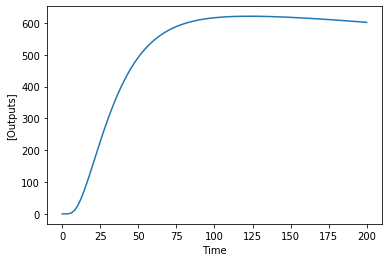

In [5]:
from auto_reduce.utils import get_ODE
timepoints_ode = np.linspace(0, 200, 100)
sys_reduce.params_values = params_values
sys_ode = get_ODE(sys_reduce, timepoints_ode)
sol = sys_ode.solve_system().T
import matplotlib.pyplot as plt
# plt.plot(timepoints_ode, np.transpose(np.array(sys_reduce.C)@sol))
plt.plot(timepoints_ode, sol[13,:])
plt.xlabel('Time')
plt.ylabel('[Outputs]')
plt.show()

In [20]:
# We want to retain R, M_S, C_C, M_G, G, Gs
reduced_sys, fast_ss = sys_reduce.solve_timescale_separation([R, M_S, A_T, C_C, M_G, G, Gs, I1, I2])
# results = sys_reduce.reduce_simple()
results = sys_reduce.get_error_metric(reduced_sys)

attempting to retain : [3, 5, 1, 9, 11, 12, 13, 14, 8]
Successful time-scale separation solution obtained.


In [26]:
reduced_sys.x_init
reduced_sys.f[3]
results

[0.0, 0.0, 0.0, 1000000000000000.0, 0.0, 0.0, 0.0, 0.0, 2000000.0]

C_C*d4 - I2*a4*(C_C*d4*d_S + C_C*d4*k_r + M_S*k_r*k_tl)/(I2*a4*d_S + I2*a4*k_r + d_S*d_Ss + d_Ss*k_r)

6324403.423839905

Text(0.5, 0, 'Time')

Text(0, 0.5, '[Outputs]')

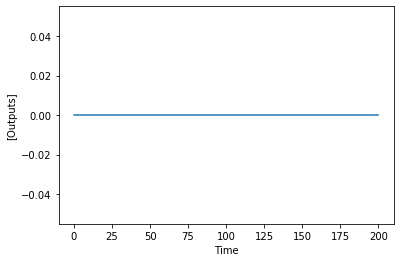

In [11]:
# reduced_sys.f
timepoints_ode = np.linspace(0, 200, 100)
reduced_sys.params_values = params_values
sys_reduced_ode = get_ODE(reduced_sys, timepoints_ode)
sol_reduced = sys_reduced_ode.solve_system().T
import matplotlib.pyplot as plt
# plt.plot(timepoints_ode, np.transpose(np.array(sys_reduce.C)@sol))
plt.plot(timepoints_ode, sol_reduced[6,:])
plt.xlabel('Time')
plt.ylabel('[Outputs]')
plt.show()

In [7]:
results

6324403.423839905

Text(0.5, 0, 'Time')

Text(0, 0.5, '[Outputs]')

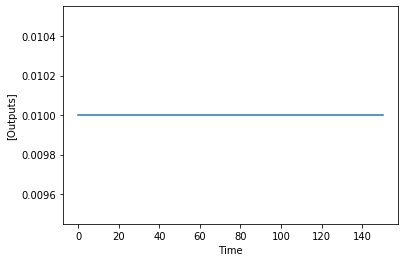

In [85]:
from auto_reduce.utils import get_ODE
timepoints_ode = np.linspace(0, 150, 100)
sys_reduce.params_values = params_values
sysr_ode = get_ODE(reduced_sys, timepoints_ode)
solr = sysr_ode.solve_system().T
import matplotlib.pyplot as plt
plt.plot(timepoints_ode, np.transpose(np.array(reduced_sys.C)@solr))
plt.xlabel('Time')
plt.ylabel('[Outputs]')
plt.show()

In [9]:
#A_C, A_T, Ss, S
sys_reduce.x

[P1, A_T, C1, R, C2, M_S, S, Ss, I2, C_C, A_C, M_G, G, Gs, I1]

In [10]:
dict1 = {}
dict1[P1] = C2**2

In [11]:
# 3,5,9,10,11,12,14
sys_reduce.x

[P1, C1, T1, R, C2, M_S, S, Ss, I2, C_C, M_G, G, Gs, T2, I1]

In [12]:
f_cons = sys_reduce.f

In [13]:
f_cons

[C1*d1 - I1*P1*a1,
 -C1*I1*a2 - C1*d1 + C2*d2 + I1*P1*a1,
 -C2*T1*a3 + R*k1*(-T1 + T1_tot) + d3*(-T1 + T1_tot),
 -R*d_R - R*k1*(-T1 + T1_tot) - R*k2*(-T2 + T2_tot) + b_C*(-T2 + T2_tot),
 C1*I1*a2 - C2*T1*a3 - C2*d2 + d3*(-T1 + T1_tot),
 -M_S*d_M + b_A*(-T1 + T1_tot),
 M_S*k_tl - S*d_S - S*k_r,
 C_C*d4 - I2*Ss*a4 + S*k_r - Ss*d_Ss,
 C_C*d4 - I2*Ss*a4,
 -C_C*T2*a5 - C_C*d4 + I2*Ss*a4 + d5*(-T2 + T2_tot),
 -M_G*d_M + b_C*(-T2 + T2_tot),
 -G*d_G - G*k_r2 + M_G*k_G,
 G*k_r2 - Gs*d_Gs,
 -C_C*T2*a5 + R*k2*(-T2 + T2_tot) + d5*(-T2 + T2_tot),
 -C1*I1*a2 + C1*d1 + C2*d2 - I1*P1*a1]

In [56]:
from sympy import solve, Eq
collapsed_sols = {}
collapsed_sols[P1] = solve(Eq(f_cons[0]),P1)[0]
f_cons[1] = f_cons[1].subs(P1,collapsed_sols[P1])
collapsed_sols[C1] = solve(Eq(f_cons[1]),C1)[0]
collapsed_sols[T1] = solve(Eq(f_cons[2]),T1)[0]

collapsed_sols[P1] = collapsed_sols[P1].subs(C1, collapsed_sols[C1])
f_cons[3] = f_cons[3].subs(T1, collapsed_sols[T1])

f_cons[4] = f_cons[4].subs(C1,collapsed_sols[C1])
f_cons[4] = f_cons[4].subs(T1,collapsed_sols[T1])

collapsed_sols[C2] = solve(Eq(f_cons[4]),C2)[0]

f_cons[5] = f_cons[5].subs(T1, collapsed_sols[T1])
# S, Ss, I2
collapsed_sols[S] = solve(Eq(f_cons[6]),S)[0]

f_cons[7] = f_cons[7].subs(S, collapsed_sols[S])
collapsed_sols[Ss] = solve(Eq(f_cons[7]),Ss)[0]

f_cons[8] = f_cons[8].subs(Ss, collapsed_sols[Ss])

collapsed_sols[T2] = solve(Eq(f_cons[13]),T2)[0]

f_cons[9] = f_cons[9].subs(T2, collapsed_sols[T2])
f_cons[10] = f_cons[10].subs(T2, collapsed_sols[T2])
f_cons[3] = f_cons[3].subs(T2, collapsed_sols[T2])
f_cons[14] = f_cons[14].subs(C1, collapsed_sols[C1])

In [57]:
collapsed_sols

{P1: C2*d1*d2/(I1**2*a1*a2),
 C1: C2*d2/(I1*a2),
 T1: T1_tot*(R*k1 + d3)/(C2*a3 + R*k1 + d3),
 C2: 0,
 S: M_S*k_tl/(d_S + k_r),
 Ss: (C_C*d4*d_S + C_C*d4*k_r + M_S*k_r*k_tl)/(I2*a4*d_S + I2*a4*k_r + d_S*d_Ss + d_Ss*k_r),
 T2: T2_tot*(R*k2 + d5)/(C_C*a5 + R*k2 + d5)}

In [55]:
f_cons[14]
sys_reduce.x

C2*d1*d2/(I1*a2) - I1*P1*a1

[P1, C1, T1, R, C2, M_S, S, Ss, I2, C_C, M_G, G, Gs, T2, I1]

In [17]:
# 3,5,9,10,11,12,14
# [R, M_S, C_C, M_G, G, Gs, I1]
f_red = []
f_red.append(f_cons[3])
f_red.append(f_cons[5])
f_red.append(f_cons[9])
f_red.append(f_cons[10])
f_red.append(f_cons[11])
f_red.append(f_cons[12])
f_red.append(f_cons[14])
f_red[0]

-R*d_R - R*k1*(-T1_tot*(R*k1 + d3)/(C2*a3 + R*k1 + d3) + T1_tot) - R*k2*(-T2 + T2_tot) + b_C*(-T2 + T2_tot)

In [51]:
f_red[6]

C2*d1*d2/(I1*a2) - I1*P1*a1

In [52]:
reduced_sys.x
reduced_sys.f[6]

[R, M_S, C_C, M_G, G, Gs, I1]

0

In [20]:
f_cons_subs = [fi for fi in f_cons]
for i in range(len(f_cons)):
    fic = f_cons[i]
    f_cons_subs[i] = fic.subs({b_A:2,
    d_M:0.1,
    k_tl:0.1,
    d_S:0.03,
    d_Ss:0.03,
    d_G:0.03,
    d_Gs:0.03,
    d_R:0.03,
    b_C:20,
    d_R:0.3,
    k_r2:0.2,
    I1:2e6,
    k_G:0.1,
    a1:10,
    d1:10,
    a2:20,
    d2:10,
    a3:50,
    d3:10,
    a4:20,
    d4:10,
    a5:50,
    d5:20,
    k1:1,
    k2:1})
    print(fic.free_symbols)

{P1, d1, C1, I1, a1}
{C2, C1, a2, I1, d2}
{T1, k1, C2, T1_tot, d3, a3, R}
{k1, C2, d3, a3, d_R, k2, T2_tot, T1_tot, R, T2, b_C}
{k1, C2, d3, a3, T1_tot, R}
{k1, C2, M_S, d3, a3, d_M, T1_tot, b_A, R}
{S, k_tl, M_S, k_r, d_S}
{d4, k_tl, M_S, C_C, k_r, a4, Ss, d_S, d_Ss, I2}
{d4, k_tl, M_S, C_C, k_r, a4, d_Ss, d_S, I2}
{d4, a5, C_C, a4, d5, Ss, T2_tot, R, I2, k2}
{a5, C_C, d5, d_M, M_G, T2_tot, b_C, R, k2}
{d_G, k_r2, k_G, G, M_G}
{G, k_r2, Gs, d_Gs}
{T2_tot, a5, C_C, k2, R, T2, d5}
{d1, C2, a1, d2, P1, a2, I1}


In [21]:
f_cons.free_symbols

AttributeError: 'list' object has no attribute 'free_symbols'